Importing Required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from imblearn.over_sampling import SMOTE  # imblearn library can be installed using pip install imblearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objs as go
import plotly .offline as offline
import plotly.figure_factory as ff
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
#pip install xgboost
#pip install imblearn

Importing the datset and analysing

In [ ]:
dataset = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option('display.max_columns', None) # Will ensure that all columns are displayed
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

Checking for Null values

In [ ]:
dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Printing all the column names

In [ ]:
dataset.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Dropping Customer Id(identity) feature as it is not useful

In [ ]:
dataset = dataset.drop('customerID', axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Checking the count of columns

In [ ]:
dataset.shape

(7043, 20)

Data Exploration - Checking churn,Senior citizen ,Internet Service, Phone Service features

In [ ]:
dataset.loc[:, 'Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
dataset.loc[:, 'SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
dataset.loc[:, 'InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
dataset.loc[:, 'PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

Plotting correalation heatmap of numeric features

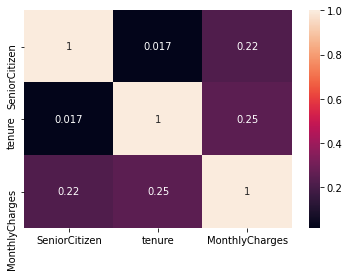

In [ ]:
plt.figure()
Corr=dataset[dataset.columns].corr()
sns.heatmap(Corr,annot=True)

converting the non-numeric data into numeric data.

In [ ]:
# converting the non-numeric data into numeric data.
from sklearn.preprocessing import LabelEncoder
dataset1 = dataset.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
dataset1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


plotting heat map for all the feature to check Correlation

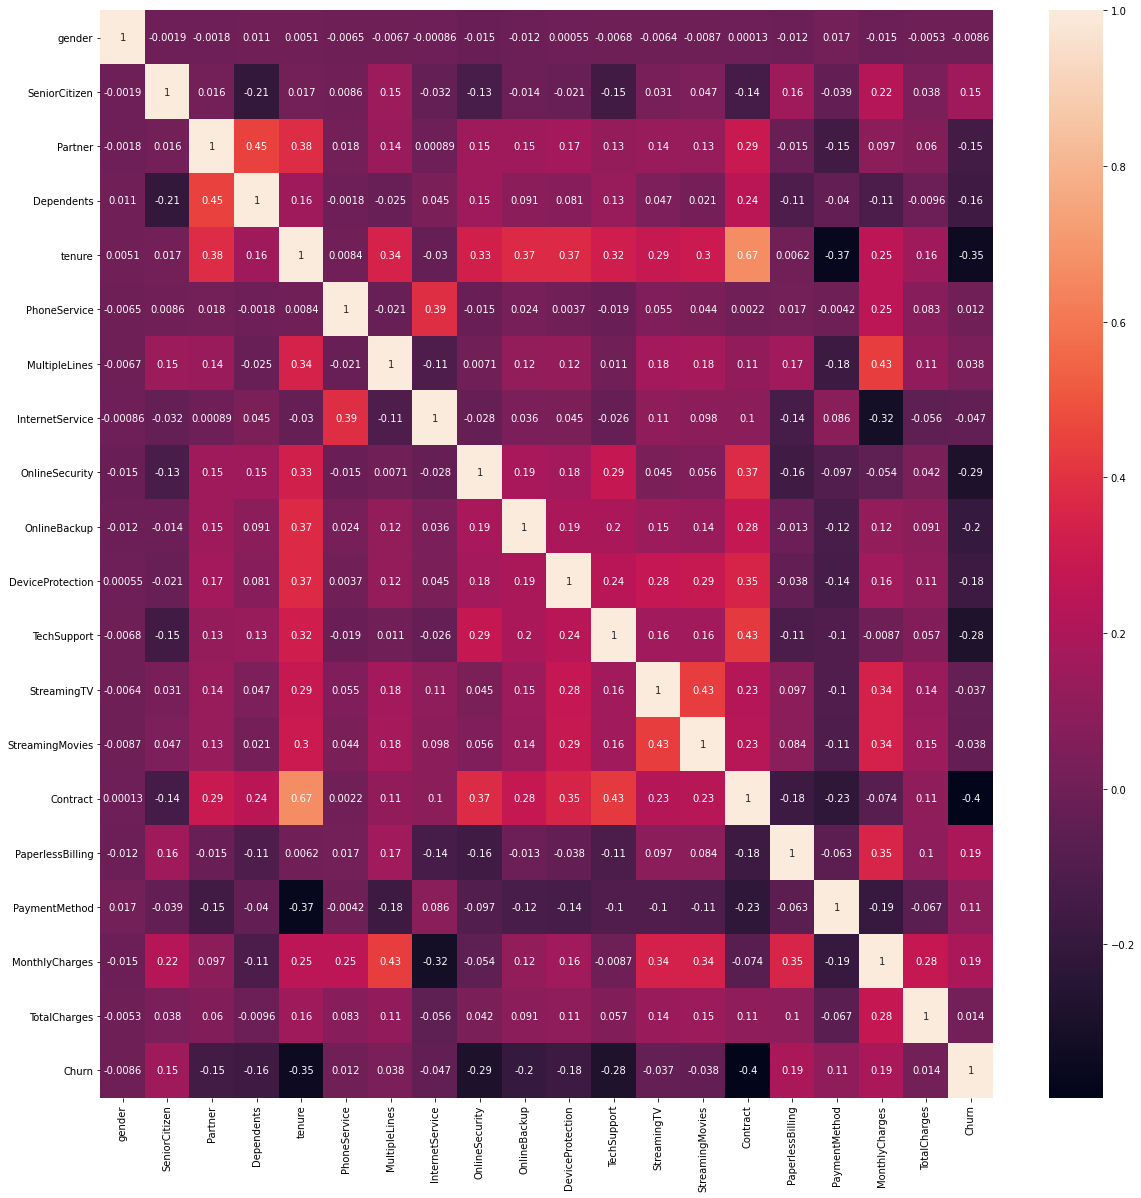

In [ ]:
plt.figure(figsize =(20,20))
Corr=dataset1[dataset1.columns].corr()
sns.heatmap(Corr,annot=True)

Deviding the dataset into feature and taget label

In [ ]:
# Dividing dataset into label and feature sets
X = dataset1.drop(['Churn'], axis = 1) # Features
Y = dataset1['Churn'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(7043, 19)
(7043,)


Normalizing numerical features

In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

Dividing the datset into Train and Test sets

In [ ]:
# Dividing dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split( X_scaled, Y, test_size = 0.3, random_state = 100)

Checking the shape to check number of columns and instances

In [ ]:
print(X_train.shape)
print(X_test.shape)

(4930, 19)
(2113, 19)


Implementing SMOTE for oversampling

In [ ]:
# Implementing Oversampling to balance the dataset; SMOTE stands for Synthetic Minority Oversampling TEchnique
print("Number of observations in each class before oversampling (training data): \n", pd.Series(Y_train).value_counts())
smote = SMOTE(random_state = 101)
X_train,Y_train = smote.fit_sample(X_train,Y_train)

Number of observations in each class before oversampling (training data): 
 0    3627
1    1303
Name: Churn, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print("Number of observations in each class after oversampling (training data): \n", pd.Series(Y_train).value_counts())

Number of observations in each class after oversampling (training data): 
 1    3627
0    3627
dtype: int64


Random Forest Classifier implementation and its Grid search input values

In [ ]:
rfc = RandomForestClassifier(criterion='entropy', max_features='auto', random_state=1)
grid_param = {'n_estimators': [300,350,400, 450, 500, 550, 600, 650, 700, 750, 800]}

gd_sr = GridSearchCV(estimator=rfc, param_grid=grid_param, scoring='recall', cv=5)

Fitting the model

In [ ]:
gd_sr.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, ra

Printing Best Paramters

In [ ]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'n_estimators': 800}


In [ ]:
best_result = gd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)
print(type(best_result))

0.8642906811057282
<class 'numpy.float64'>


Running the RF model for optimal parameter obtained

In [ ]:
rfc = RandomForestClassifier(n_estimators=800, criterion='entropy', max_features='auto', random_state=5)
rfc.fit(X_train,Y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(Y_test, rfc_pred))
print('Accuracy score:',accuracy_score(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

[[1308  239]
 [ 229  337]]
Accuracy score: 0.7785139611926172
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1547
           1       0.59      0.60      0.59       566

    accuracy                           0.78      2113
   macro avg       0.72      0.72      0.72      2113
weighted avg       0.78      0.78      0.78      2113



Printing feature importance graph

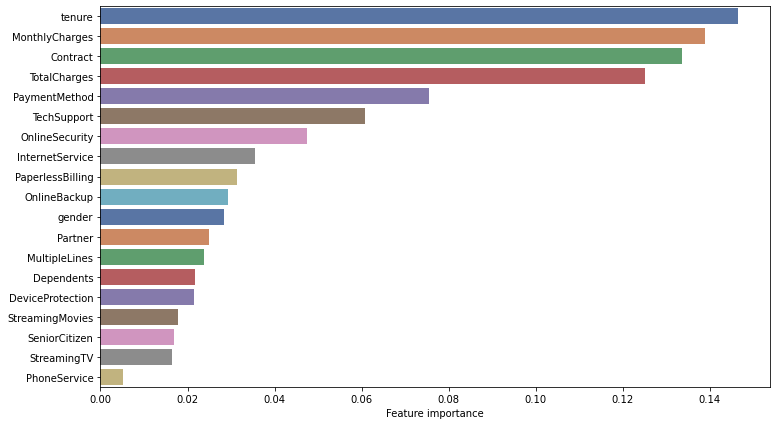

In [ ]:
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x= featimp.values, y = featimp.index, palette='deep')
plt.xlabel('Feature importance')
plt.show()

Printing Feature Importance List

In [ ]:
featimp = pd.Series(rfc.feature_importances_, index=list(X)).sort_values(ascending=False)
print(featimp)

tenure              0.146498
MonthlyCharges      0.138954
Contract            0.133511
TotalCharges        0.125099
PaymentMethod       0.075372
TechSupport         0.060735
OnlineSecurity      0.047561
InternetService     0.035406
PaperlessBilling    0.031300
OnlineBackup        0.029196
gender              0.028473
Partner             0.024839
MultipleLines       0.023732
Dependents          0.021794
DeviceProtection    0.021424
StreamingMovies     0.017821
SeniorCitizen       0.016795
StreamingTV         0.016408
PhoneService        0.005081
dtype: float64


Plotting RF Confusion Matrix

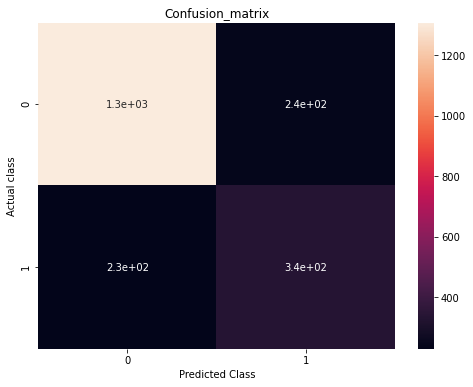

Confusion matrix: 
 [[1308  239]
 [ 229  337]]
TP:  337
TN:  1308
FP:  239
FN:  229


In [ ]:
Y_pred = rfc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

SVC Classifier and defining Grid Search Hyperparamters

In [ ]:
from sklearn.svm import SVC 
svc = SVC(random_state=1)
grid_param = {'C': [0.1, 1, 10, 25, 50, 100, 1000]}
gd_sr_sv = GridSearchCV(estimator=svc, param_grid=grid_param, scoring='recall', cv=5)

Fitting the model

In [ ]:
gd_sr_sv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 25, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

Printing SVC Best Parameters

In [ ]:
best_parameters_svc = gd_sr_sv.best_params_
print(best_parameters_svc)

{'C': 25}


In [ ]:
best_result = gd_sr_sv.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)
print(type(best_result))

0.8830553814002091
<class 'numpy.float64'>


Running the SVC Model for optimal values from Grid Search

In [ ]:
svc = SVC(C=25, random_state=1)

Printing Accuracy, Confusion matrix and Classification Report

In [ ]:
svc.fit(X_train,Y_train)
svc_pred = svc.predict(X_test)
print(confusion_matrix(Y_test,svc_pred))
print('accuracy_score:',accuracy_score(Y_test, svc_pred))
print(classification_report(Y_test, svc_pred))

[[1222  325]
 [ 223  343]]
accuracy_score: 0.7406530998580217
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1547
           1       0.51      0.61      0.56       566

    accuracy                           0.74      2113
   macro avg       0.68      0.70      0.69      2113
weighted avg       0.76      0.74      0.75      2113



plotting SVC Confusion Matrix

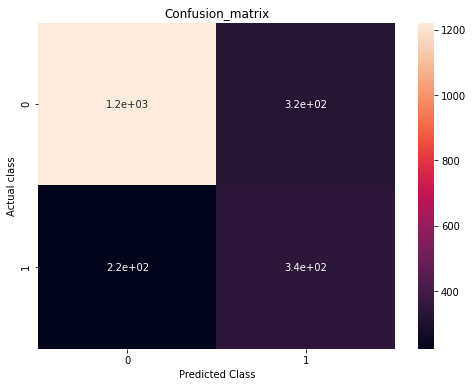

Confusion matrix: 
 [[1222  325]
 [ 223  343]]
TP:  343
TN:  1222
FP:  325
FN:  223


In [ ]:
svc_pred = svc.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, svc_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

KNN classifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=4, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Fitting KNN Classifier

In [ ]:
yk_pred = classifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 5, scoring='accuracy').mean())

0.7973558306993989


Printing KNN Evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test, yk_pred))
print(classification_report(Y_test, yk_pred))
accuracy_score(Y_test, yk_pred)

[[1166  381]
 [ 213  353]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1547
           1       0.48      0.62      0.54       566

    accuracy                           0.72      2113
   macro avg       0.66      0.69      0.67      2113
weighted avg       0.75      0.72      0.73      2113



0.7188831045906294

Printing KNN Confusion Matrix

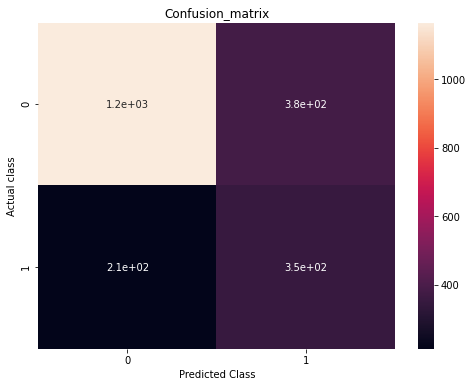

Confusion matrix: 
 [[1166  381]
 [ 213  353]]
TP:  353
TN:  1166
FP:  381
FN:  213


In [ ]:
yk_pred = classifier.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, yk_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

XG Boost Classiifer and Providing Grid Search Values

In [ ]:
xg_class=xgb.XGBClassifier(random_state=1)
xggrid_param = {'n_estimators': [400, 450 ,500, 550, 600, 650, 700],'learning_rate': [0.01,0.1, 0.5, 1]}

xggd_sr = GridSearchCV(estimator=xg_class, param_grid=xggrid_param, scoring='recall', cv=5)

In [ ]:
xggd_sr.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=1, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [400, 450, 500, 550, 600, 650, 700]},
             pre_dispatch='2*n_jobs

Printing XGBoost Best Paramters

In [ ]:
best_parameters = xggd_sr.best_params_
print(best_parameters)

{'learning_rate': 0.01, 'n_estimators': 450}


In [ ]:
best_result = xggd_sr.best_score_ # Mean cross-validated score of the best_estimator
print(best_result)
print(type(best_result))

0.8640322979006363
<class 'numpy.float64'>


Printing XGBoost Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
xg_class = xgb.XGBClassifier(n_estimators=450, learning_rate=0.01, random_state=1)
xg_class.fit(X_train,Y_train)
xgb_pred = xg_class.predict(X_test)
print(confusion_matrix(Y_test,xgb_pred))
print('Accuracy score:',accuracy_score(Y_test, xgb_pred))
print(classification_report(Y_test, xgb_pred))

[[1153  394]
 [ 144  422]]
Accuracy score: 0.7453857075248462
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1547
           1       0.52      0.75      0.61       566

    accuracy                           0.75      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113



Plotting XGBoost Confusion Matrix

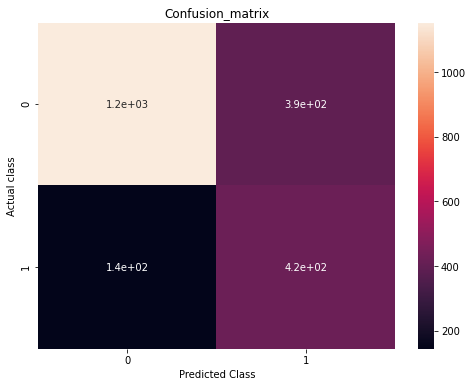

Confusion matrix: 
 [[1153  394]
 [ 144  422]]
TP:  422
TN:  1153
FP:  394
FN:  144


In [ ]:
xgb_pred = xg_class.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, xgb_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])

Importing Packages for ANN

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [ ]:
#pip install keras

In [ ]:
#pip install tensorflow

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 19))

In [ ]:
# Adding the second hidden layer
ann.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [ ]:
# Adding the output layer
ann.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['Recall','accuracy','AUC'])

Fitting ANN with by providing epoch and batch sizes

In [ ]:
ann.fit(X_train, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50
726/726 [==============================] - 2s 1ms/step - loss: 0.5759 - recall: 0.7634 - accuracy: 0.7393 - auc: 0.7806
Epoch 2/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4665 - recall: 0.8189 - accuracy: 0.7815 - auc: 0.8587
Epoch 3/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4668 - recall: 0.8049 - accuracy: 0.7805 - auc: 0.8582
Epoch 4/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4558 - recall: 0.8084 - accuracy: 0.7921 - auc: 0.8648
Epoch 5/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4528 - recall: 0.8058 - accuracy: 0.7905 - auc: 0.8675
Epoch 6/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4426 - recall: 0.8192 - accuracy: 0.7977 - auc: 0.8739
Epoch 7/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4493 - recall: 0.8217 - accuracy: 0.7929 - auc: 0.8692
Epoch 8/50
726/726 [==============================] - 1s 1ms/step - loss: 0.4331 - 

ANN prediction on test set

In [ ]:
yann_pred = ann.predict(X_test)
yannb_pred = (yann_pred > 0.5)
print(np.concatenate((yannb_pred.reshape(len(yannb_pred),1), Y_test.values.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 0]
 [0 0]]


Printing ANN evaluation metrics

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(Y_test, yannb_pred)
print(cm)
print("accuracy: %f" % accuracy_score(Y_test, yannb_pred))
print(classification_report(Y_test, yannb_pred))

[[1142  405]
 [ 149  417]]
accuracy: 0.737814
              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1547
           1       0.51      0.74      0.60       566

    accuracy                           0.74      2113
   macro avg       0.70      0.74      0.70      2113
weighted avg       0.78      0.74      0.75      2113



Printing ANN Confusion matrix

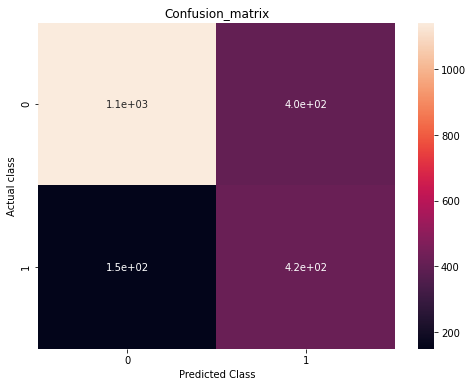

Confusion matrix: 
 [[1142  405]
 [ 149  417]]
TP:  417
TN:  1142
FP:  405
FN:  149


In [ ]:
yann_pred = ann.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test, yannb_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat)
print('TP: ', conf_mat[1,1])
print('TN: ', conf_mat[0,0])
print('FP: ', conf_mat[0,1])
print('FN: ', conf_mat[1,0])